In [1]:
import numpy as np
import pandas as pd
import sklearn.neighbors
import sklearn.model_selection
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition

In [2]:
def score_embedding(data, labels, k=10, n_neighbors=5, random_state=42):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    cv = sklearn.model_selection.StratifiedKFold(n_splits=k, random_state=random_state)
    return sklearn.model_selection.cross_val_score(model, data, labels, cv=cv)

In [3]:
def compare_embeddings(embeddings, n_neighbors=5, k=10, random_state=42):
    cross_val_scores = {}
    for alg in embeddings.keys():
        cross_val_scores[alg] = score_embedding(embeddings[alg][['x', 'y']].values, 
                                                embeddings[alg]['labels'].values,
                                                n_neighbors=n_neighbors,
                                                k=k,
                                                random_state=random_state)
    return pd.DataFrame(cross_val_scores).assign(n_neighbors=n_neighbors)

In [4]:
mnist = {}
mnist['tsne'] = pd.read_csv('embedding_mnist_tsne1.csv', index_col=0)
mnist['umap'] = pd.read_csv('embedding_mnist_umap1.csv', index_col=0)
mnist['lvis'] = pd.read_csv('embedding_mnist_largevis1.csv', index_col=0)
mnist['fits'] = pd.read_csv('embedding_mnist_fitsne1.csv', index_col=0)
mnist['leig'] = pd.read_csv('embedding_mnist_eigenmaps1.csv', index_col=0)
mnist['pca'] = pd.read_csv('embedding_mnist_pca.csv', index_col=0)

In [5]:
df = pd.concat(compare_embeddings(mnist, n_neighbors=n, k=20) for n in (100,200,400,800,1600,3200))

In [6]:
df.groupby('n_neighbors').mean()

,tsne,umap,lvis,fits,leig,pca
n_neighbors,,,,,,
100,0.966814,0.967086,0.962086,0.962430,0.668203,0.462462
200,0.965571,0.967044,0.961501,0.961330,0.667402,0.467119
400,0.963672,0.966844,0.961372,0.961073,0.664216,0.468376
800,0.962886,0.966372,0.961087,0.956930,0.659859,0.468161
1600,0.959158,0.965572,0.947202,0.950072,0.651231,0.466532
3200,0.946073,0.964472,0.920000,0.941830,0.639146,0.459290


In [7]:
df.groupby('n_neighbors').std() * 2

,tsne,umap,lvis,fits,leig,pca
n_neighbors,,,,,,
100,0.014501,0.013522,0.014769,0.014832,0.015889,0.022992
200,0.015189,0.013566,0.014725,0.014796,0.015668,0.023741
400,0.015481,0.013541,0.014899,0.015148,0.015925,0.024198
800,0.015933,0.014173,0.015353,0.016067,0.016802,0.022643
1600,0.016245,0.014441,0.015143,0.017657,0.014491,0.023009
3200,0.016894,0.014494,0.017172,0.018426,0.017428,0.022325


In [8]:
import seaborn as sns
sns.set()

In [9]:
tidy_df = df.reset_index().melt(id_vars=['index', 'n_neighbors'], 
                                value_vars=['fits', 'leig', 'lvis', 'pca', 'tsne', 'umap'])
tidy_df = tidy_df.rename(columns={'index':'fold', 'variable':'algorithm'})
tidy_df = tidy_df[tidy_df.algorithm != 'fits']

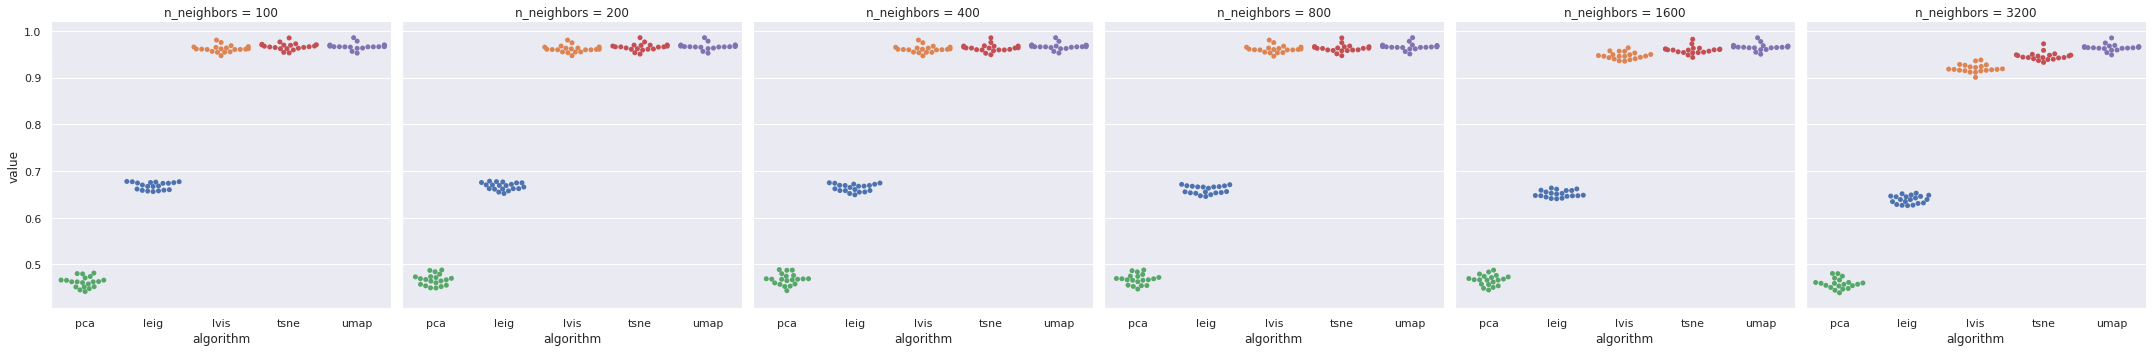

In [12]:
sns.catplot(x='algorithm', 
            y='value', 
            hue='algorithm', 
            kind='swarm', 
            col='n_neighbors',
            order=['pca', 'leig', 'lvis', 'tsne', 'umap'],
            data=tidy_df)